In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [4]:
NitrogenDiOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/NitrogenDiOxide_2019.csv")
NitrogenDiOxide2020.describe()



,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,5412.000000,5412.0,5412.000000,5412.000000,5412.0,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000
mean,2705.500000,36.0,46.410200,74.193644,42602.0,1.246859,41.661691,-75.558180,23.097191,96.251293,11.684832,23.028936,11.446046,21.283075,203.883592,31060.162602
std,1562.454159,0.0,33.420395,52.817265,0.0,0.657920,1.063890,2.286769,2.489485,10.367006,7.181306,12.455802,8.112921,11.786074,175.782506,9352.997931
min,0.000000,36.0,5.000000,5.000000,42602.0,1.000000,40.736140,-78.809526,3.000000,13.000000,0.689474,1.100000,0.000000,1.000000,74.000000,15380.000000
25%,1352.750000,36.0,5.000000,15.000000,42602.0,1.000000,40.739264,-78.765825,24.000000,100.000000,6.408333,13.000000,5.000000,12.000000,74.000000,15380.000000
50%,2705.500000,36.0,29.000000,110.000000,42602.0,1.000000,40.867900,-73.902000,24.000000,100.000000,10.092654,21.100000,8.000000,20.000000,99.000000,35620.000000
75%,4058.250000,36.0,81.000000,125.000000,42602.0,1.000000,42.921107,-73.821530,24.000000,100.000000,15.445833,31.400000,20.000000,29.000000,212.000000,35620.000000
max,5411.000000,36.0,103.000000,133.000000,42602.0,3.000000,43.145013,-73.139046,24.000000,100.000000,48.200000,67.200000,23.000000,65.000000,574.000000,40380.000000


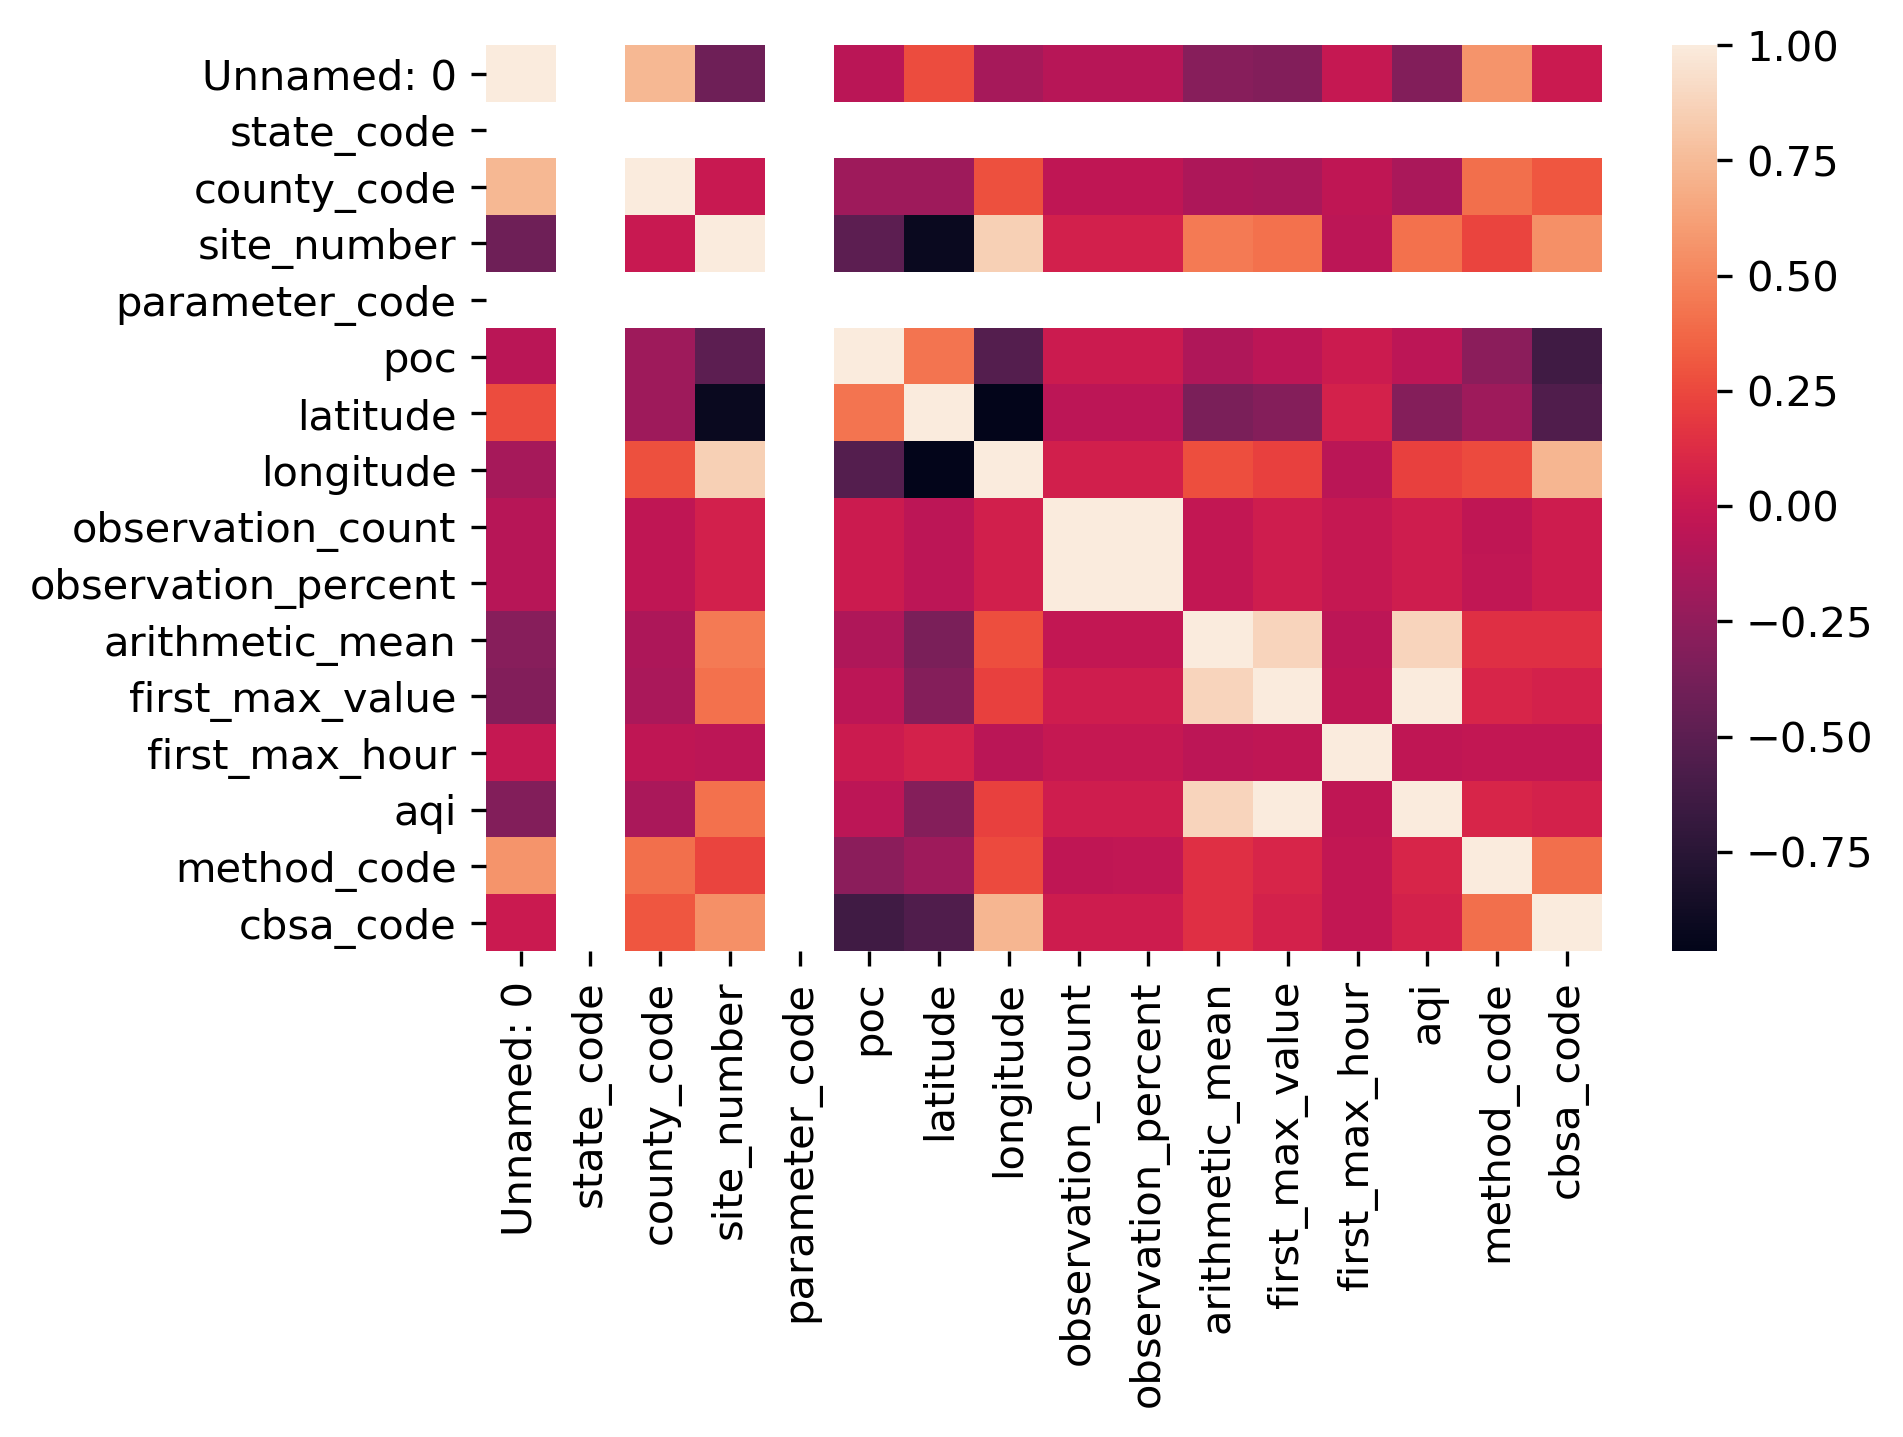

In [5]:

corr=NitrogenDiOxide2020.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(3)
# plt.matshow(corr)
# plt.show()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/filename.png',dpi=300)

In [6]:
missingValueCount=NitrogenDiOxide2020.isnull().sum()
print(missingValueCount)

Unnamed: 0             0
state_code             0
county_code            0
site_number            0
parameter_code         0
poc                    0
latitude               0
longitude              0
datum                  0
parameter              0
sample_duration        0
pollutant_standard     0
date_local             0
units_of_measure       0
event_type             0
observation_count      0
observation_percent    0
validity_indicator     0
arithmetic_mean        0
first_max_value        0
first_max_hour         0
aqi                    0
method_code            0
method                 0
local_site_name        0
site_address           0
state                  0
county                 0
city                   0
cbsa_code              0
cbsa                   0
date_of_last_change    0
dtype: int64


In [7]:
NitrogenDiOxide2020.shape
list(NitrogenDiOxide2020.columns) 
print(NitrogenDiOxide2020['method_code'].unique())
print(NitrogenDiOxide2020['pollutant_standard'].unique())
grouped=NitrogenDiOxide2020.groupby(['pollutant_standard'])
print(grouped['pollutant_standard'].count())
print(NitrogenDiOxide2020['sample_duration'].unique())
print(NitrogenDiOxide2020['units_of_measure'].unique())
print(NitrogenDiOxide2020['event_type'].unique())



[ 74 212  99 574 200]
['NO2 Annual 1971' 'NO2 1-hour']
pollutant_standard
NO2 1-hour         2706
NO2 Annual 1971    2706
Name: pollutant_standard, dtype: int64
['1 HOUR']
['Parts per billion']
['None']


In [8]:
#1. removing columns

#removing country_code and state_code because it is same for all data points




#2. removing rows
NitrogenDiOxide2020New=NitrogenDiOxide2020[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','state']].copy()

NitrogenDiOxide2020New = NitrogenDiOxide2020New[NitrogenDiOxide2020New['pollutant_standard'] == "NO2 1-hour"] 
print(NitrogenDiOxide2020New.shape)

#----begin converting date_local column type from object to datetime64-------

#3. parsing dates
NitrogenDiOxide2020New['date_local']=pd.to_datetime(NitrogenDiOxide2020New['date_local'])

# NitrogenDiOxide2020New.index=NitrogenDiOxide2020New['date_local']


#4. null value check

missingValueCount=NitrogenDiOxide2020New.isnull().sum()
print(missingValueCount)

                               



(2706, 11)
date_local            0
site_number           0
parameter             0
sample_duration       0
pollutant_standard    0
validity_indicator    0
arithmetic_mean       0
first_max_value       0
aqi                   0
local_site_name       0
state                 0
dtype: int64


In [9]:
######Remove Invalid Values ######

print(NitrogenDiOxide2020New['validity_indicator'].unique())
grouped=NitrogenDiOxide2020New.groupby(['validity_indicator'])
print(grouped['validity_indicator'].count())


NitrogenDiOxide2020New = NitrogenDiOxide2020New[NitrogenDiOxide2020New['validity_indicator'] == "Y"] 
print(NitrogenDiOxide2020New.shape)
# NitrogenDiOxide2020New.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/ozone_ny_data_2020.csv')




['Y' 'N']
validity_indicator
N      80
Y    2626
Name: validity_indicator, dtype: int64
(2626, 11)


In [10]:
#5. duplicate check

duplicate = NitrogenDiOxide2020New[NitrogenDiOxide2020New.duplicated(['date_local','local_site_name','arithmetic_mean','first_max_value','aqi'])] 
    
print(duplicate)

    

Empty DataFrame
Columns: [date_local, site_number, parameter, sample_duration, pollutant_standard, validity_indicator, arithmetic_mean, first_max_value, aqi, local_site_name, state]
Index: []


In [11]:
#6. removing outliers using robust z-score --- use this

#plot some graph
med=np.median(NitrogenDiOxide2020New['arithmetic_mean'])
ma = stats.median_abs_deviation(NitrogenDiOxide2020New['arithmetic_mean'])
mad=np.median(ma)
NitrogenDiOxide2020New = NitrogenDiOxide2020New.query('(((0.6745*(arithmetic_mean-@med))/@mad)<3) & (((0.6745*(arithmetic_mean-@med))/@mad)>-3)')
print(NitrogenDiOxide2020New.shape)
NitrogenDiOxide2020New.describe()

(2553, 11)


,site_number,arithmetic_mean,first_max_value,aqi
count,2553.000000,2553.000000,2553.000000,2553.000000
mean,73.157854,11.012176,22.334587,20.624755
std,53.022092,6.105851,11.761102,11.120079
min,5.000000,0.689474,1.100000,1.000000
25%,15.000000,6.333333,12.900000,11.000000
50%,110.000000,9.795833,20.700000,19.000000
75%,125.000000,14.882609,30.500000,28.000000
max,133.000000,28.770833,59.900000,56.000000


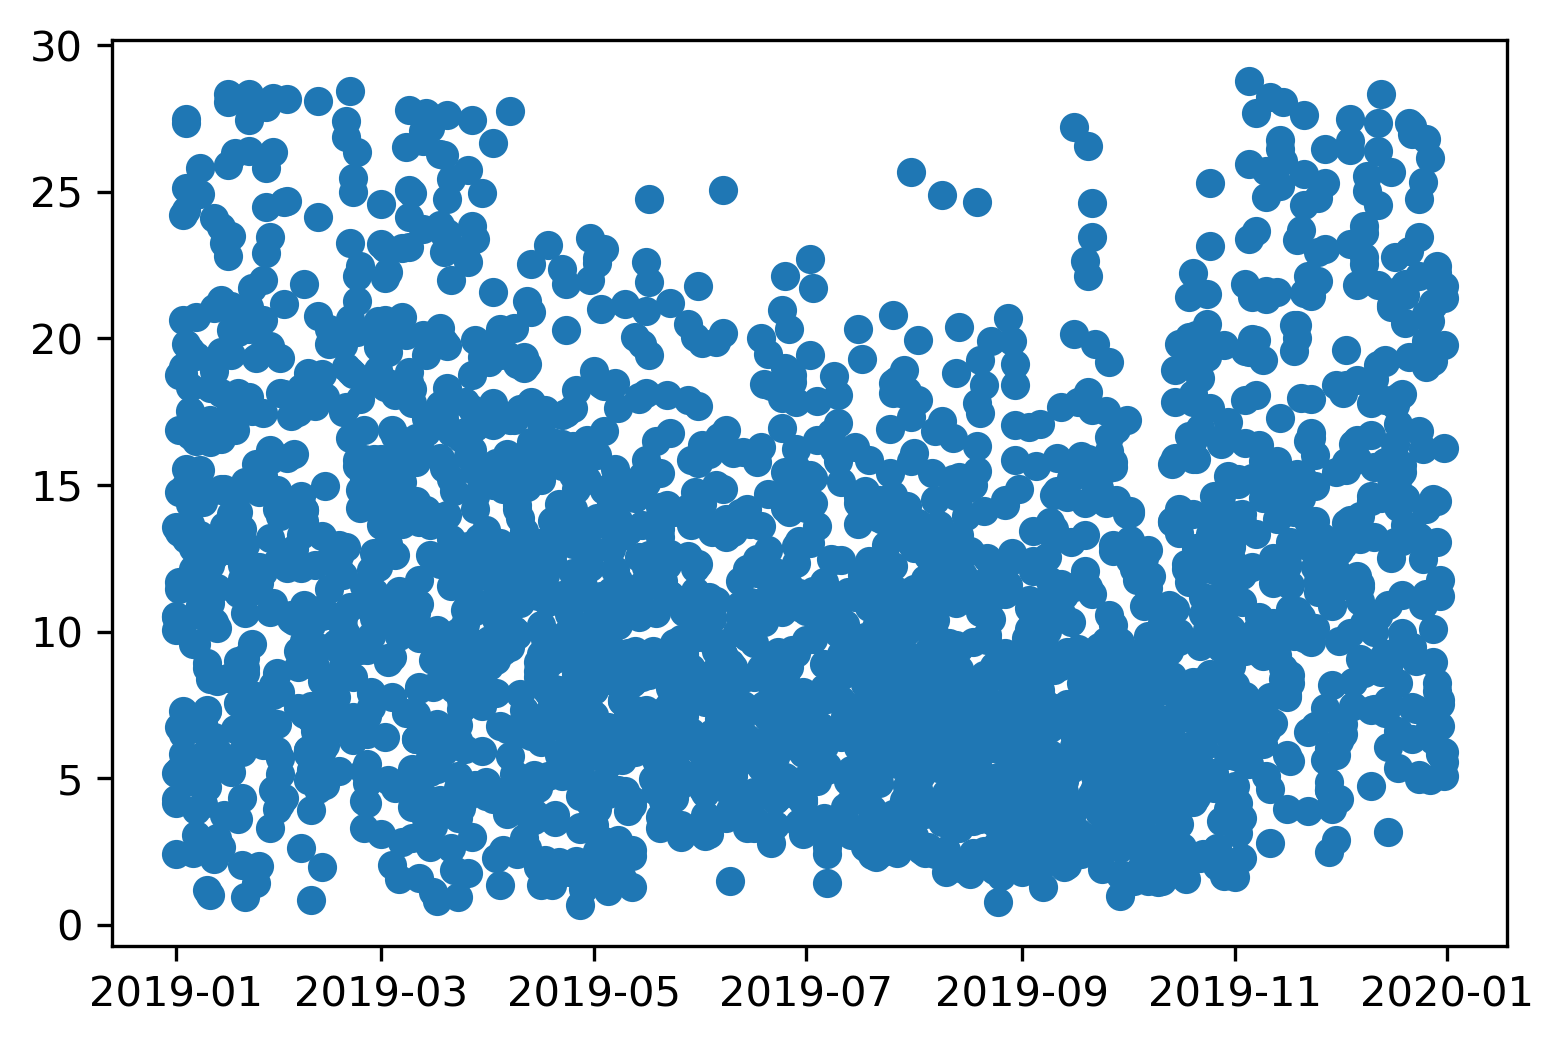

In [13]:
#group by date and average
plt.scatter(x=NitrogenDiOxide2020New['date_local'], y=NitrogenDiOxide2020New['arithmetic_mean'])

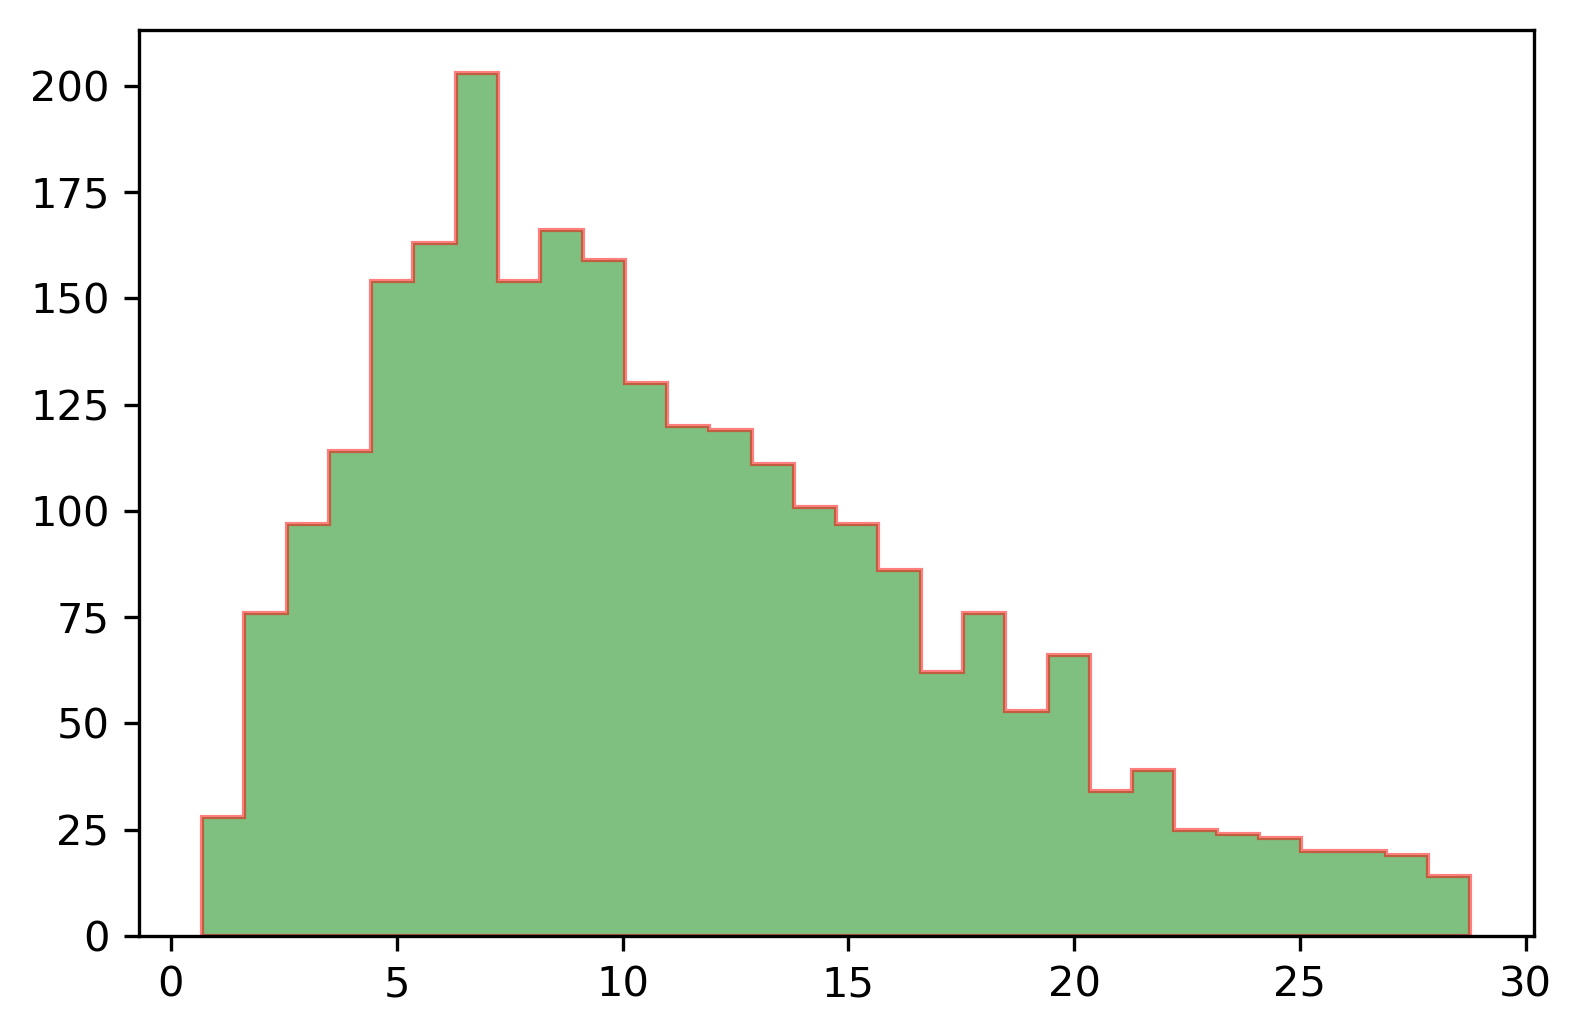

In [14]:
plt.hist(NitrogenDiOxide2020New['arithmetic_mean'], bins=30, alpha=0.5,
histtype='stepfilled', color='green',
edgecolor='red');

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


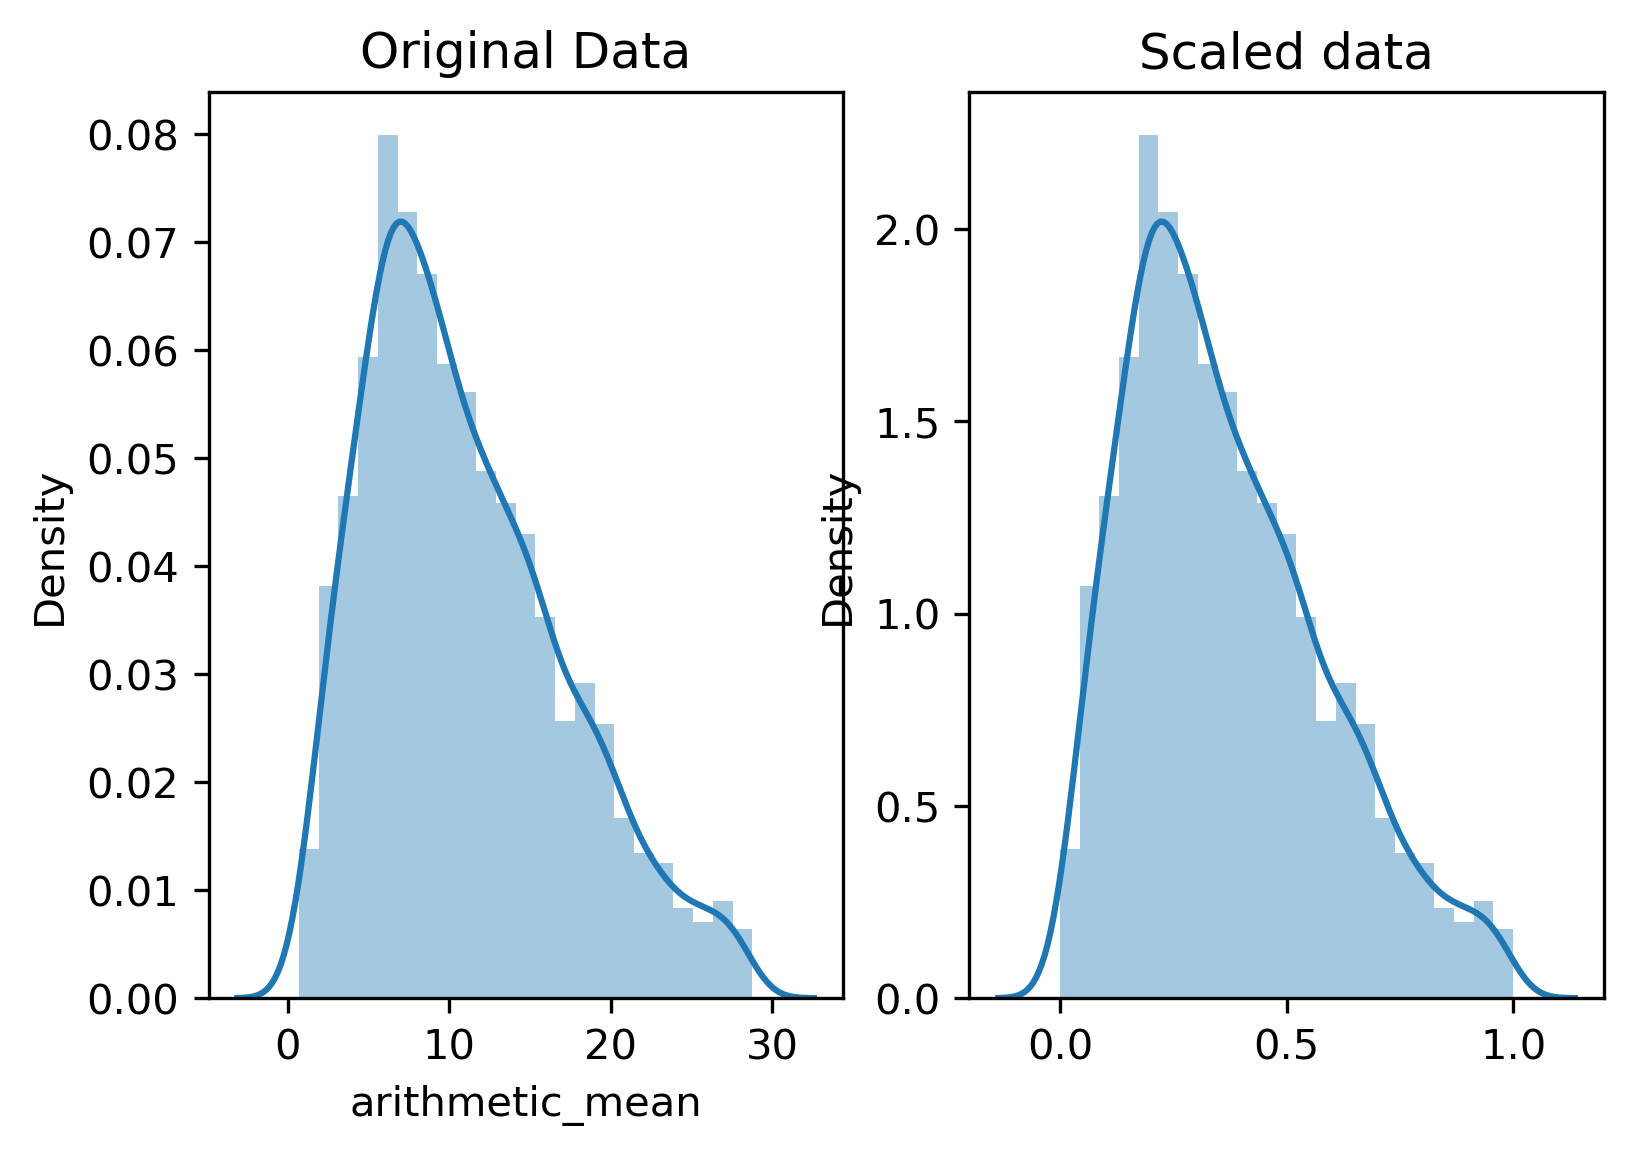

In [15]:
#7.scale

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(NitrogenDiOxide2020New['arithmetic_mean'].to_numpy().reshape(-1,1))
fig, ax=plt.subplots(1,2)

sns.distplot(NitrogenDiOxide2020New['arithmetic_mean'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
NitrogenDiOxide2020New['arithmetic_mean']=scaled_data

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

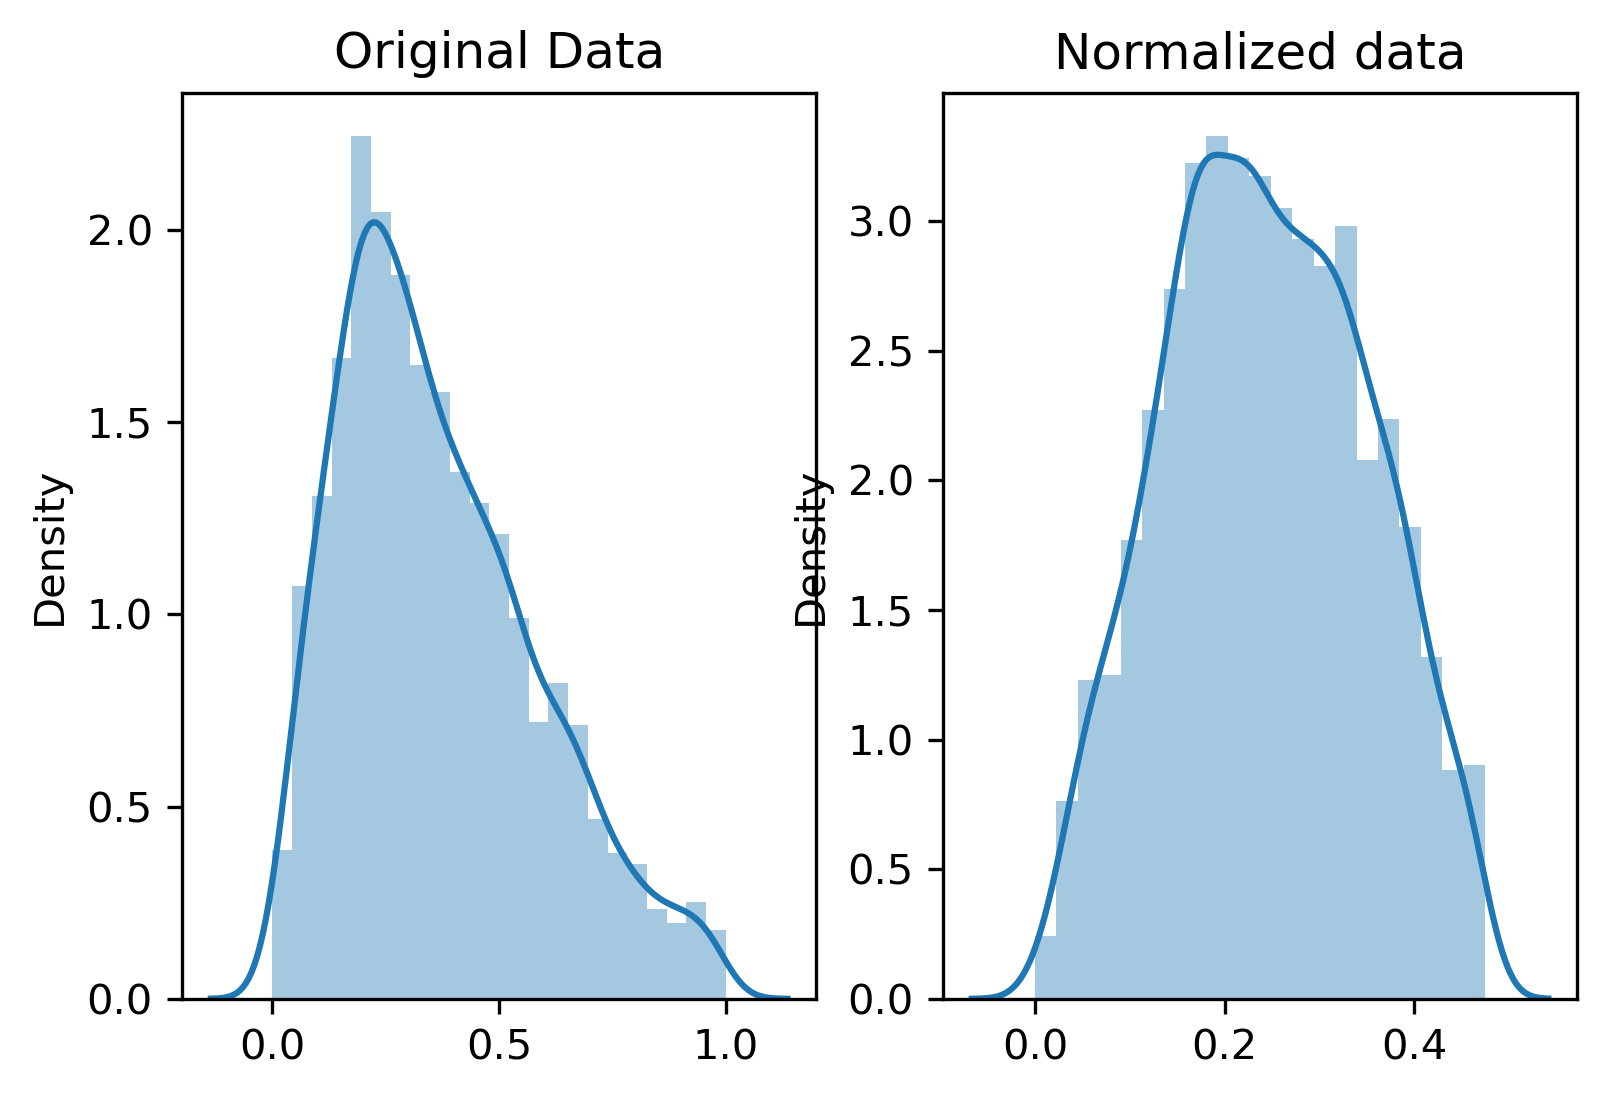

In [16]:
#8.normalize

normalized_data = stats.yeojohnson(NitrogenDiOxide2020New['arithmetic_mean'])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(scaled_data.flatten(), ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [ ]:
# 9. creating new season,month,weekend column


In [ ]:
#10 . Merging


In [ ]:
sns.pairplot(df, hue="species")